## Proving the Same with Poisson

In [7]:
"""Adding All Necessary Libraries and Constants"""
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean, stdev
from sympy import *
from IPython.display import display

NUMBER_OF_TRIALS: int = 10000

Given:

$M_{X_{i}}(t) = e^{\lambda(e^{t} - 1)}$

$\bar{X} = \frac{x_{1} + x_{2} + \cdot \cdot \cdot + x_{n}}{n}$

===================

$M_{\bar{X}}(t) = E(e^{t\bar{X}})$

$= E(e^{t(\frac{x_{1} + x_{2} + \cdot \cdot \cdot + x_{n}}{n})})$

$= E(e^{\frac{x_{1}t}{n}})E(e^{\frac{x_{1}t}{n}})\cdot \cdot \cdot E(e^{\frac{x_{n}t}{n}})$

$= [E(e^{\frac{x_{1}t}{n}})]^{n}$

$= [M_{X_{1}}(\frac{t}{n})]^{n}$

$M_{\bar{X}}(t) =[e^{\lambda(e^{\frac{t}{n}} - 1)}]^{n}$

In [3]:
"""Calculating First Derivative of the MGF with respect to t at t = 0."""
"""Note: l is short for lambda"""

l, n, t = symbols("l n t")

d_one_mgf = diff((exp(l*(exp(t/n)-1)))**n, t)
expected_val_d_one = limit(d_one_mgf, t, 0)
print(f"The E(x̄) is {expected_val_d_one}")

The E(x̄) is l


In [4]:
"""Calculating Second Derivative of the MGF with respect to t at t = 0."""
d_two_mgf = diff((d_one_mgf), t)
expected_val_d_two = limit(d_two_mgf, t, 0)
print(f"The E(x̄^2) is {expected_val_d_two}")

The E(x̄^2) is (l**2*n + l)/n


In [5]:
"""Calculating Standard Deviation = sqrt(E(X^2) - [E(X)]^2)."""
standard_deviation = sqrt(expected_val_d_two - pow(expected_val_d_one,2))
print("Standard Deviation is ... ")
display(standard_deviation)

Standard Deviation is ... 


sqrt(-l**2 + (l**2*n + l)/n)

From Previous cell:

$\sigma = \sqrt{-\lambda^{2} + \frac{\lambda^{2}n + \lambda}{n}}$

$\sigma = \sqrt{-\frac{n\lambda^{2}}{n} + \frac{\lambda^{2}n + \lambda}{n}}$

$\sigma = \sqrt{-\frac{n\lambda^{2}}{n} + \frac{\lambda^{2}n + \lambda}{n}}$

$\sigma = \sqrt{\frac{\lambda}{n}}$

Now that we know $E(\bar{X}) = \mu = \lambda$ and $\sigma = \sqrt{\frac{\lambda}{n}}$

Therefore, 

$ \bar{X} = \frac{1}{n} \sum \limits _{i=1} ^ {n} X_{i} \approx N(\lambda, \sqrt{\frac{\lambda}{n}}) = N(\mu, \sigma)$, where $X_{i} = Poisson(\lambda)$

or alternatively

$ \bar{X} = \frac{1}{n} \sum \limits _{i=1} ^ {n} X_{i} \approx N(\lambda, \frac{\lambda}{n}) = N(\mu, \sigma^{2})$, where $X_{i} = Poisson(\lambda)$

## Verifying With Simulations

In [79]:
"""Declaring Variables"""
# can change
# as sigma approaches 0 the more normal the distrabution.
mu: int = 5
sigma: int = .05

# do not change
lmbda: int = mu
n: int = int(lmbda/pow(sigma,2))

In [80]:
"""Generating normal and Poisson data"""
normal_data = np.random.normal(mu,sigma,NUMBER_OF_TRIALS)

x_bar_data: list = []

for _ in range(0, NUMBER_OF_TRIALS):
    n_random_poisson_variables: list = np.random.poisson(lmbda, n)
    average = sum(n_random_poisson_variables) / n
    x_bar_data.append(average)

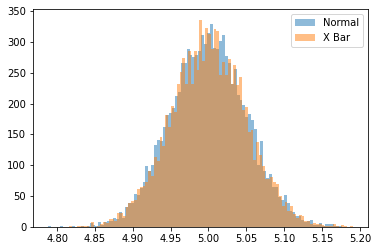

In [81]:
"""Plotting Data"""
plt.hist(normal_data, label="Normal", alpha = .5, bins=100)
plt.hist(x_bar_data, label="X Bar", alpha = .5, bins=100)
plt.legend(loc="best")
plt.show()

In [82]:
print("From Data")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Normal Dist:\nMean: {mean(normal_data)}\nStandard Deviation: {stdev(normal_data)}")
print(f"X bar Dist:\nMean: {mean(x_bar_data)}\nStandard Deviation: {stdev(x_bar_data)}")

From Data
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Normal Dist:
Mean: 4.999758945471086
Standard Deviation: 0.05002369466607569
X bar Dist:
Mean: 5.000179889944972
Standard Deviation: 0.049817365951522814
